<h1 style="text-align:center">Airborne Object Tracking Dataset</h1>
<h2 style="text-align:center;text-decoration:underline;">Dataset Walkthrough</h2>

# 🤫 Setting up

In [ ]:
import json
import random
import os, sys
sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))
from IPython.display import display, clear_output
from random import randrange
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=25,25
import numpy as np

# Because Life, Universe and Everything!
random.seed(42)

def mdprint(text):
    display({
        'text/markdown': text,
        'text/plain': text
    }, raw=True)

# ⏱ Loading the Dataset

In [2]:
# Dataset for Airborne Object Tracking Dataset
from core.dataset import Dataset

local_path = '/Users/skbly7/Terminal/aicrowd/repos/airborne-detection-starter-kit/data'
s3_path = 's3://airborne-obj-detection-challenge-training/part1/'
dataset = Dataset(local_path, s3_path)

2021-04-12 09:06:49.795 | INFO     | core.dataset:load_gt:18 - Loading ground truth...


In [16]:
# You can add multi-part dataset as well, using below..
local_path = '/Users/skbly7/Terminal/aicrowd/repos/airborne-detection-starter-kit/data/part2/'
s3_path = 's3://airborne-obj-detection-challenge-training/part2/'
dataset.add(local_path, s3_path)

# You can add multi-part dataset as well, using below..
local_path = '/Users/skbly7/Terminal/aicrowd/repos/airborne-detection-starter-kit/data/part3/'
s3_path = 's3://airborne-obj-detection-challenge-training/part3/'
dataset.add(local_path, s3_path)

2021-04-12 09:08:45.229 | INFO     | core.dataset:load_gt:18 - Loading ground truth...
2021-04-12 09:08:45.232 | INFO     | core.file_handler:download_file_if_needed:31 - [download_from_s3] File not found locally, downloading: ImageSets/groundtruth.json


# 👀 DeepDive into Flight

In [17]:
all_flight_ids = dataset.get_flight_ids()
lucky_flight_id = random.choice(all_flight_ids)
lucky_flight_id = "7a1f085ad3834f53ae8e19cbbfe1bd36"
lucky_flight = dataset.get_flight_by_id(lucky_flight_id)

mdprint("## 🔮Lucky draw tells us to continue with: `%s`" % lucky_flight_id)

mdprint("### Let's know our flight a bit more! 🔎")
print(lucky_flight)

mdprint("This flight has **%s frames** and total **%s airborne objects**." % (lucky_flight.num_frames, lucky_flight.num_airborne_objs))

mdprint("List of Airborne Objects: ")
for airborne_obj in lucky_flight.get_airborne_objects():
    mdprint("- %s " % airborne_obj)

## 🔮Lucky draw tells us to continue with: `7a1f085ad3834f53ae8e19cbbfe1bd36`

### Let's know our flight a bit more! 🔎

Flight#7a1f085ad3834f53ae8e19cbbfe1bd36(num_frames=1199, num_airborne_objs=14)


This flight has **1199 frames** and total **14 airborne objects**.

List of Airborne Objects: 

- AirborneObject#Airplane5(num_frames=547, planned=False) 

- AirborneObject#Bird8(num_frames=19, planned=False) 

- AirborneObject#Airplane2(num_frames=1046, planned=False) 

- AirborneObject#Airplane3(num_frames=352, planned=False) 

- AirborneObject#Airplane4(num_frames=280, planned=False) 

- AirborneObject#Helicopter1(num_frames=551, planned=True) 

- AirborneObject#Bird1(num_frames=1, planned=False) 

- AirborneObject#Bird3(num_frames=114, planned=False) 

- AirborneObject#Bird4(num_frames=116, planned=False) 

- AirborneObject#Bird6(num_frames=26, planned=False) 

- AirborneObject#Bird5(num_frames=114, planned=False) 

- AirborneObject#Bird2(num_frames=84, planned=False) 

- AirborneObject#Bird9(num_frames=21, planned=False) 

- AirborneObject#Bird7(num_frames=68, planned=False) 

### 🛫 We know text content isn't lucrative, no?!

#### 💾 Download whole dataset (optional)

Please note, **downloading image for each frame** would be slower, so when using for training downloading whole dataset is preferred. 

You can download full dataset using following command in your directory:

```
aws s3 sync s3://airborne-obj-detection-challenge-training/part1 part1/ --no-sign-request
aws s3 sync s3://airborne-obj-detection-challenge-training/part1 part2/ --no-sign-request
aws s3 sync s3://airborne-obj-detection-challenge-training/part1 part3/ --no-sign-request
```

#### 💾 Download whole flight (optional)

You can download individual flight using below command:

```
aws s3 sync s3://airborne-obj-detection-challenge-training/part1/Images/{{flight_id}} part1/Images/{{flight_id}} --no-sign-request
```

or:

In [6]:
lucky_flight.download()

#### 🌤 Let's quickly check how the scenery looks like in this video

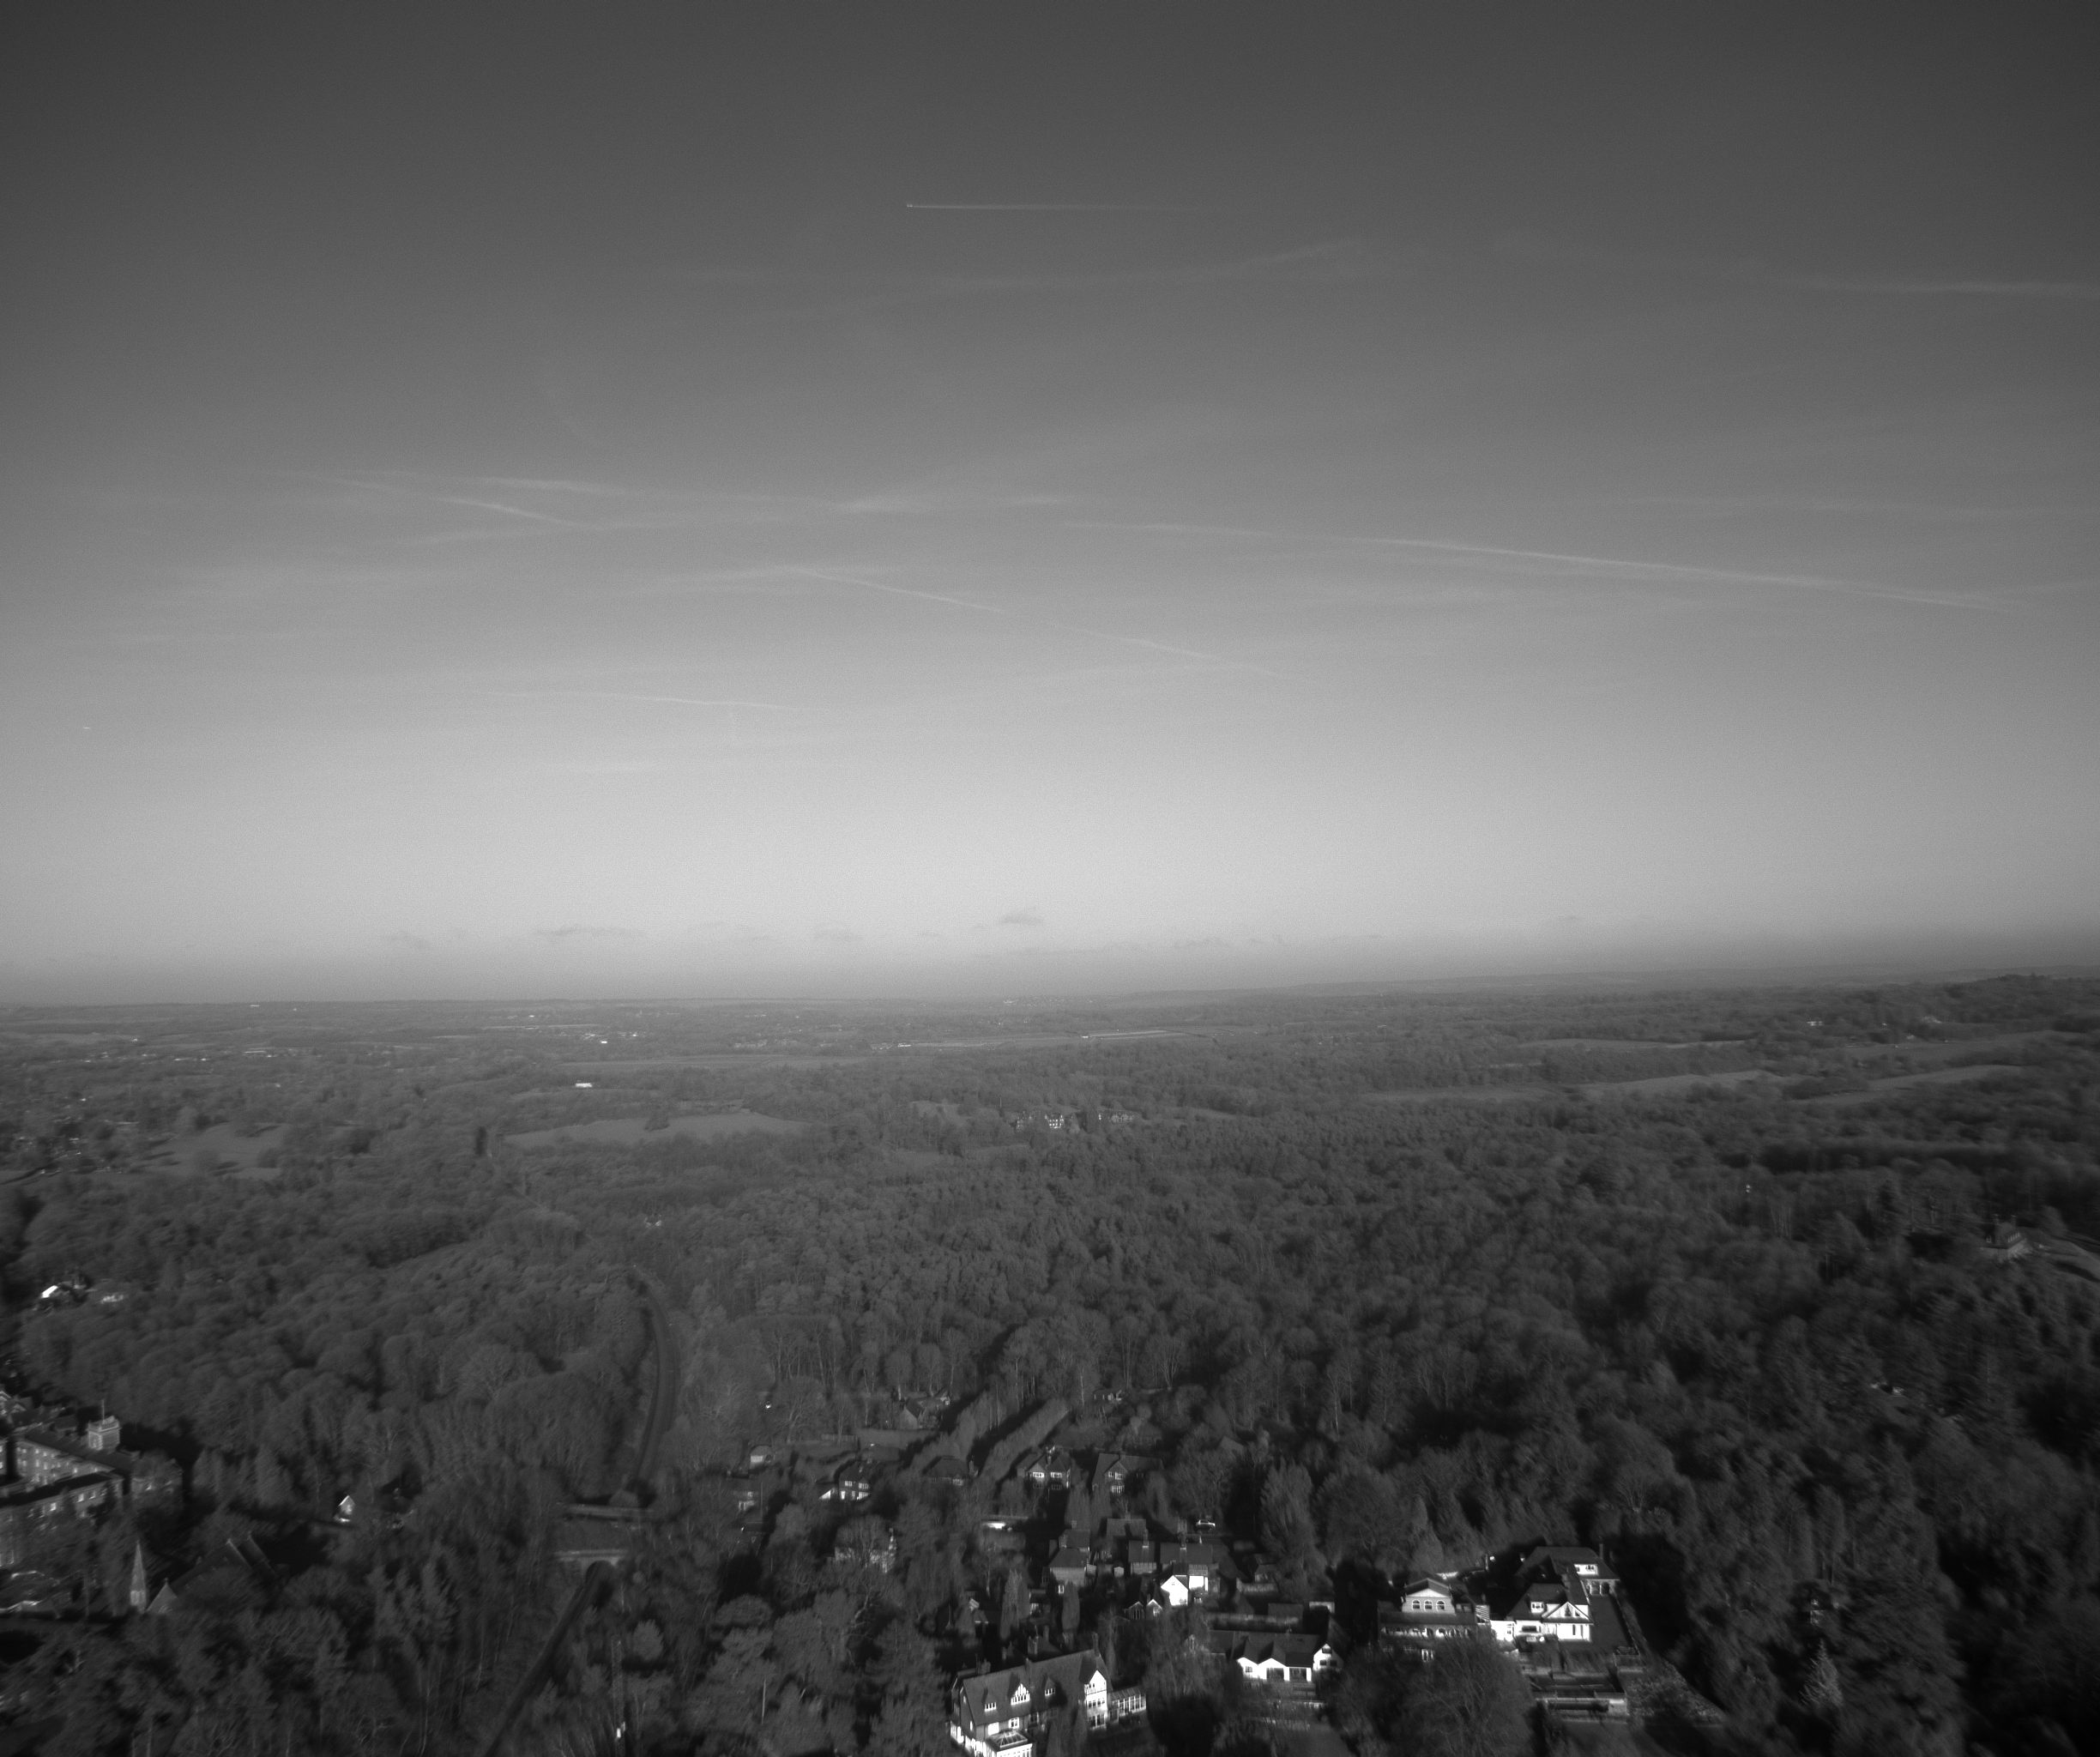

In [7]:
image = lucky_flight.get_frame(randrange(lucky_flight.num_frames)).image()
display(image)

#### 🖼️Well, one picture doesn't give much idea, let's try out few frames (n=9) 
_You can try out whole video as well if you have dataset downloaded_

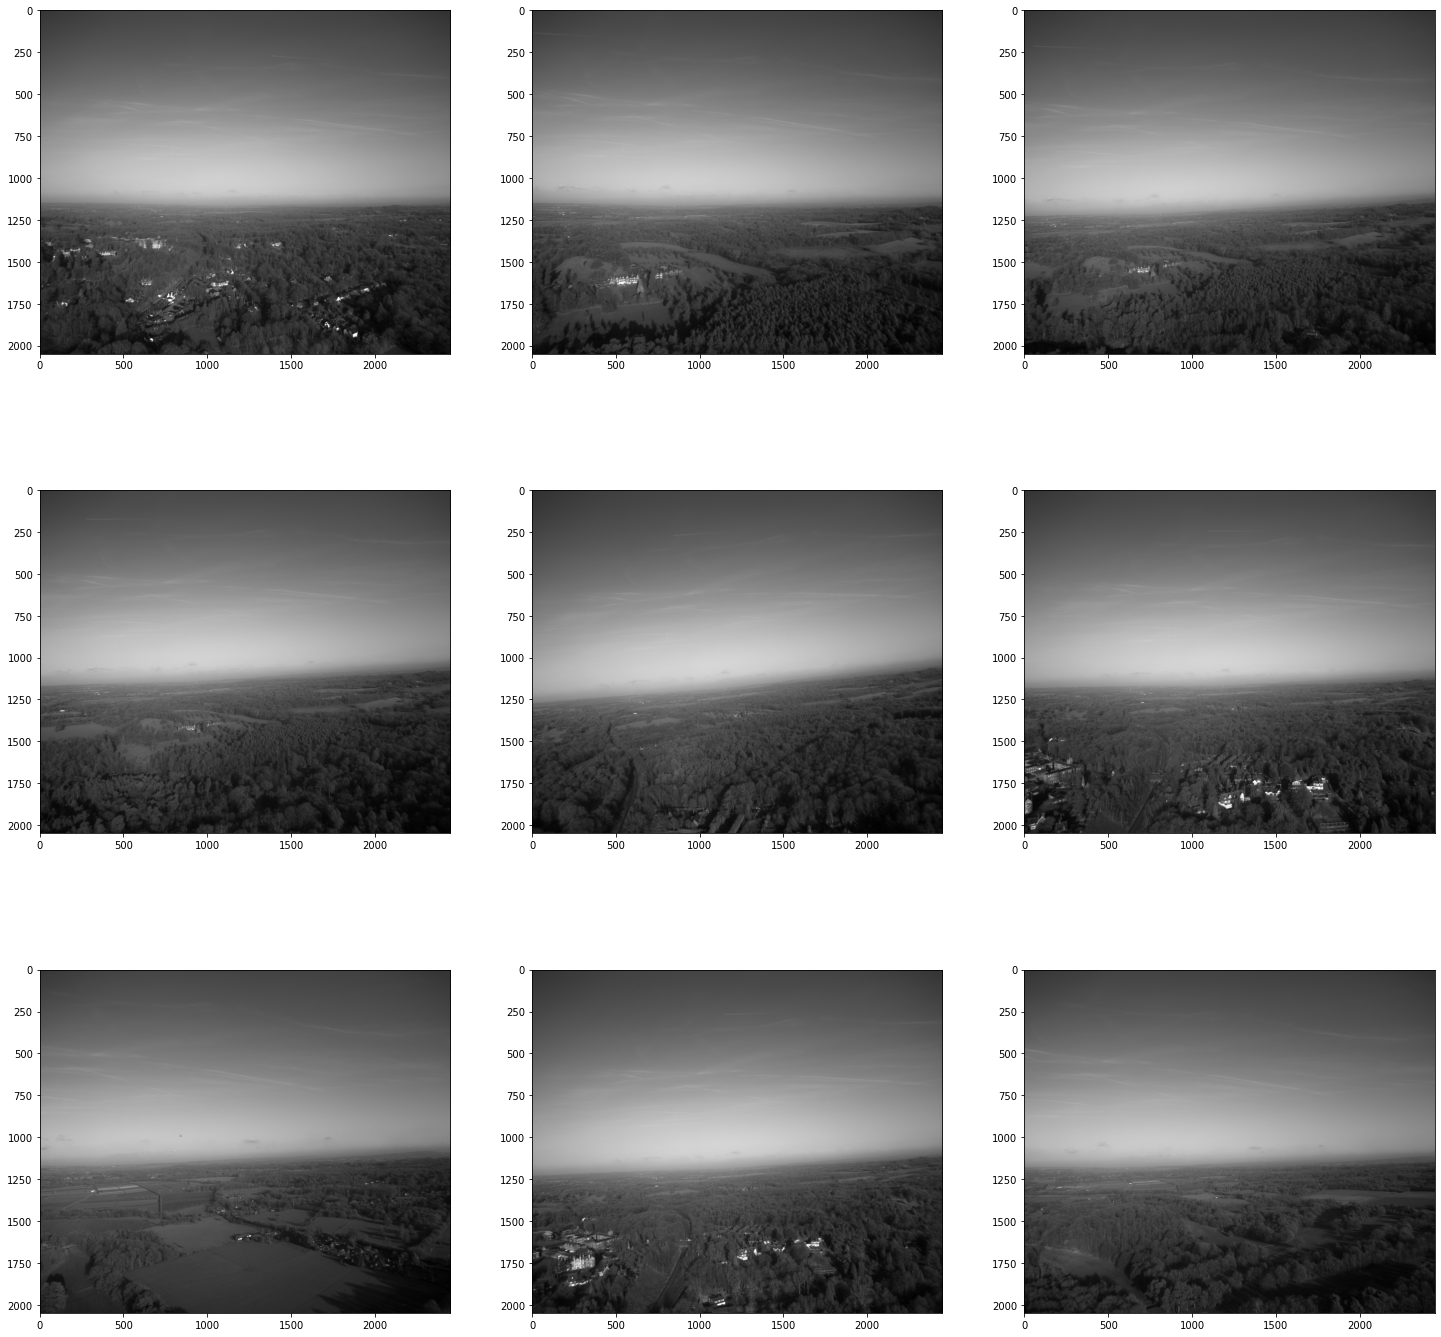

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=25,25
fig = plt.figure()

for i in range(1, 10):
    ax = fig.add_subplot(3, 3, i)
    ax.imshow(lucky_flight.get_frame(randrange(lucky_flight.num_frames)).image(type='cv2'))

plt.show()

#### 📉 Presence of the objects and distance in frames (when present)

<Figure size 2000x2000 with 0 Axes>

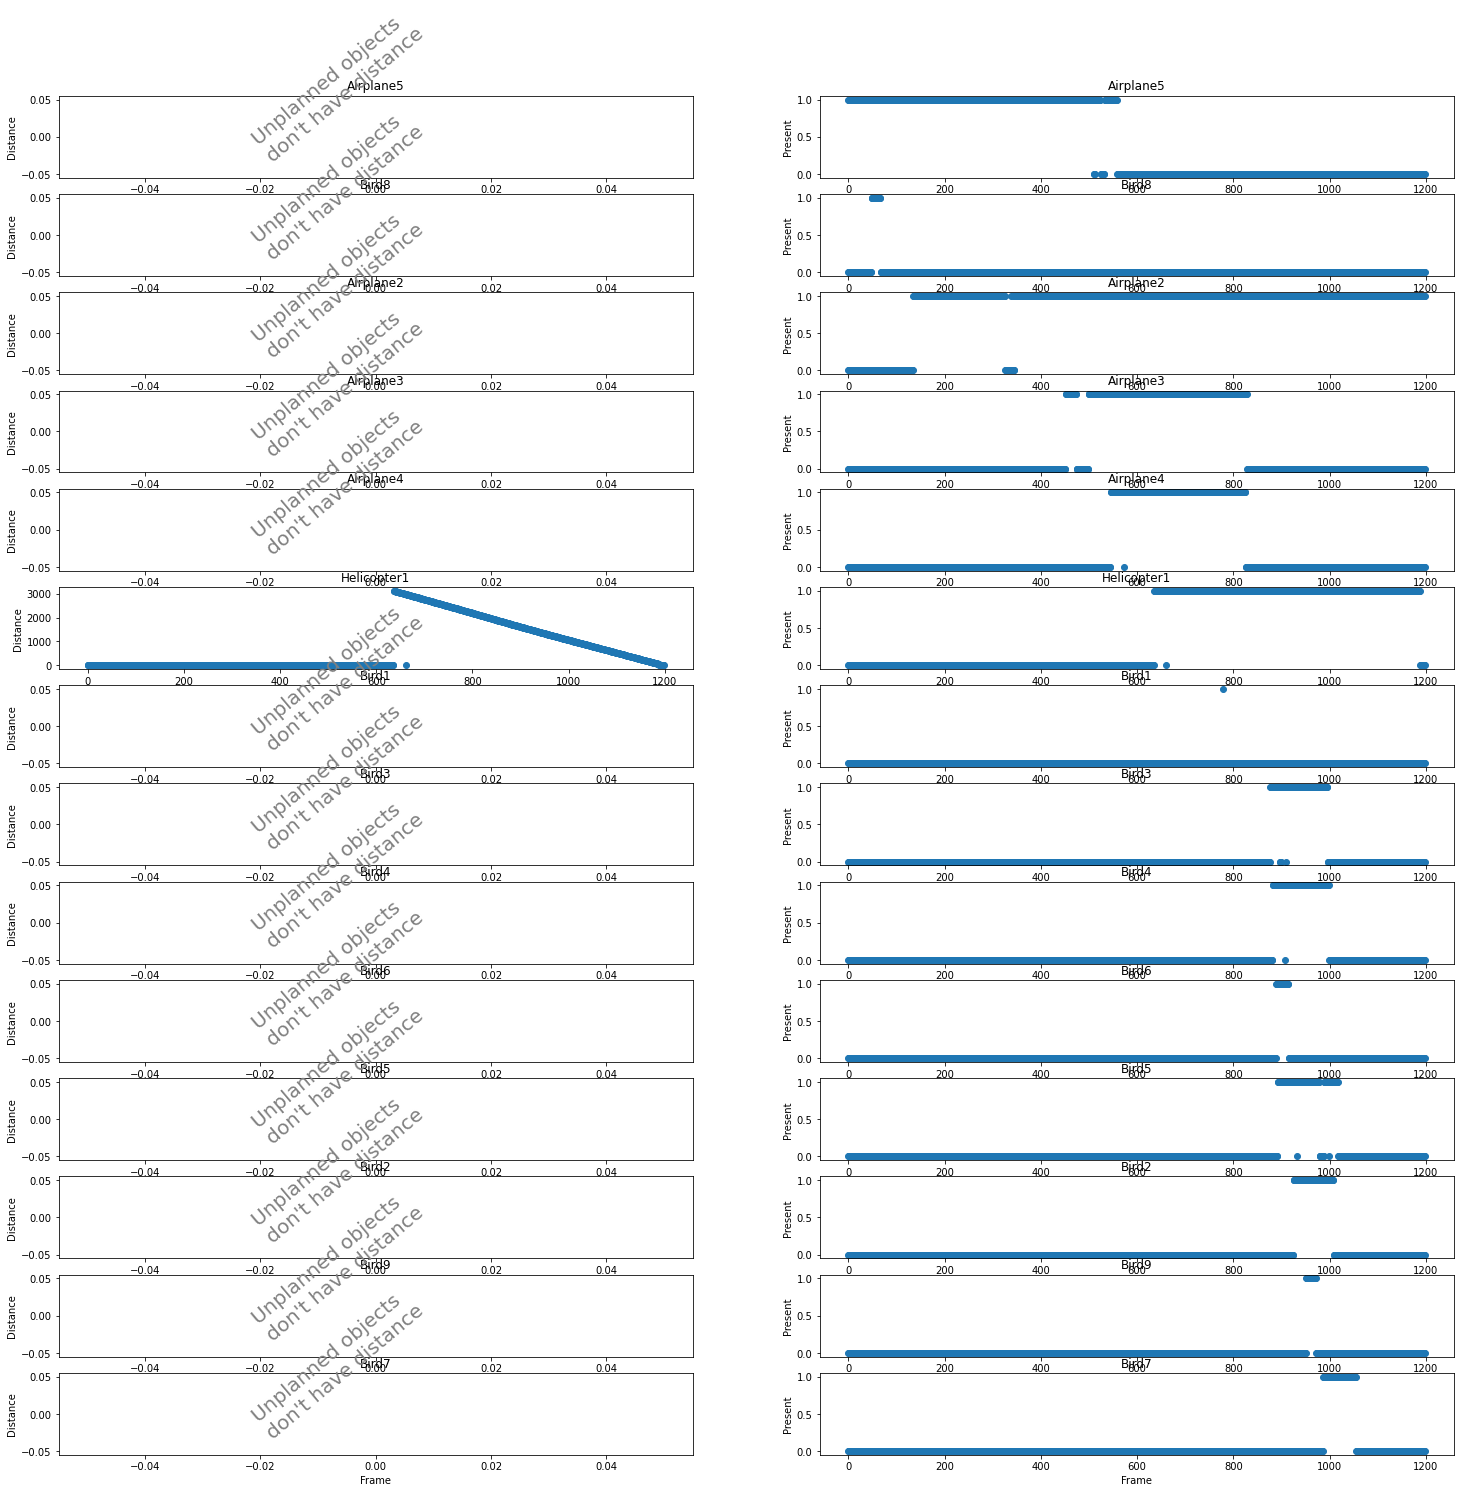

None

In [9]:
airborne_objects = lucky_flight.detected_objects
frames = lucky_flight.frames

rows = len(airborne_objects.keys())

detected = {}
distance = {}
for frame_id in lucky_flight.frames:
    f = lucky_flight.get_frame(frame_id)
    for obj in airborne_objects:
        if obj not in detected:
            detected[obj] = []
            distance[obj] = []

        if obj in f.detected_objects:
            detected[obj].append(True)
            distance[obj].append(f.detected_object_locations[obj].range_distance_m)
        else:
            detected[obj].append(False)
            if not airborne_objects[obj].planned:
                distance[obj].append(float("NaN"))
            else:
                distance[obj].append(0)

i = 0
f = plt.figure(figsize=(25, 25), dpi=80)
f, axes = plt.subplots(nrows = rows, ncols = 2, squeeze=False)

for obj in detected:
    axes[i][0].scatter(range(len(distance[obj])), distance[obj])
    axes[i][0].set_xlabel('Frame')
    axes[i][0].set_ylabel('Distance')
    axes[i][0].set_title(obj)
    
    if not airborne_objects[obj].planned:
        plt.text(0.3, 0.2, "Unplanned objects\ndon't have distance", 
                 fontsize=20, rotation=40, transform=axes[i][0].transAxes, color="grey")

    axes[i][1].scatter(range(len(detected[obj])), detected[obj])
    axes[i][1].set_xlabel('Frame')
    axes[i][1].set_ylabel('Present')
    axes[i][1].set_title(obj)
    i += 1

# for obj in detected:
#     dt = random.choice(airborne_objects[obj].location)
#     img = dt.frame.image_annotated()
#     axes[[i, i+1]][1].imshow(img)
display(plt.show())

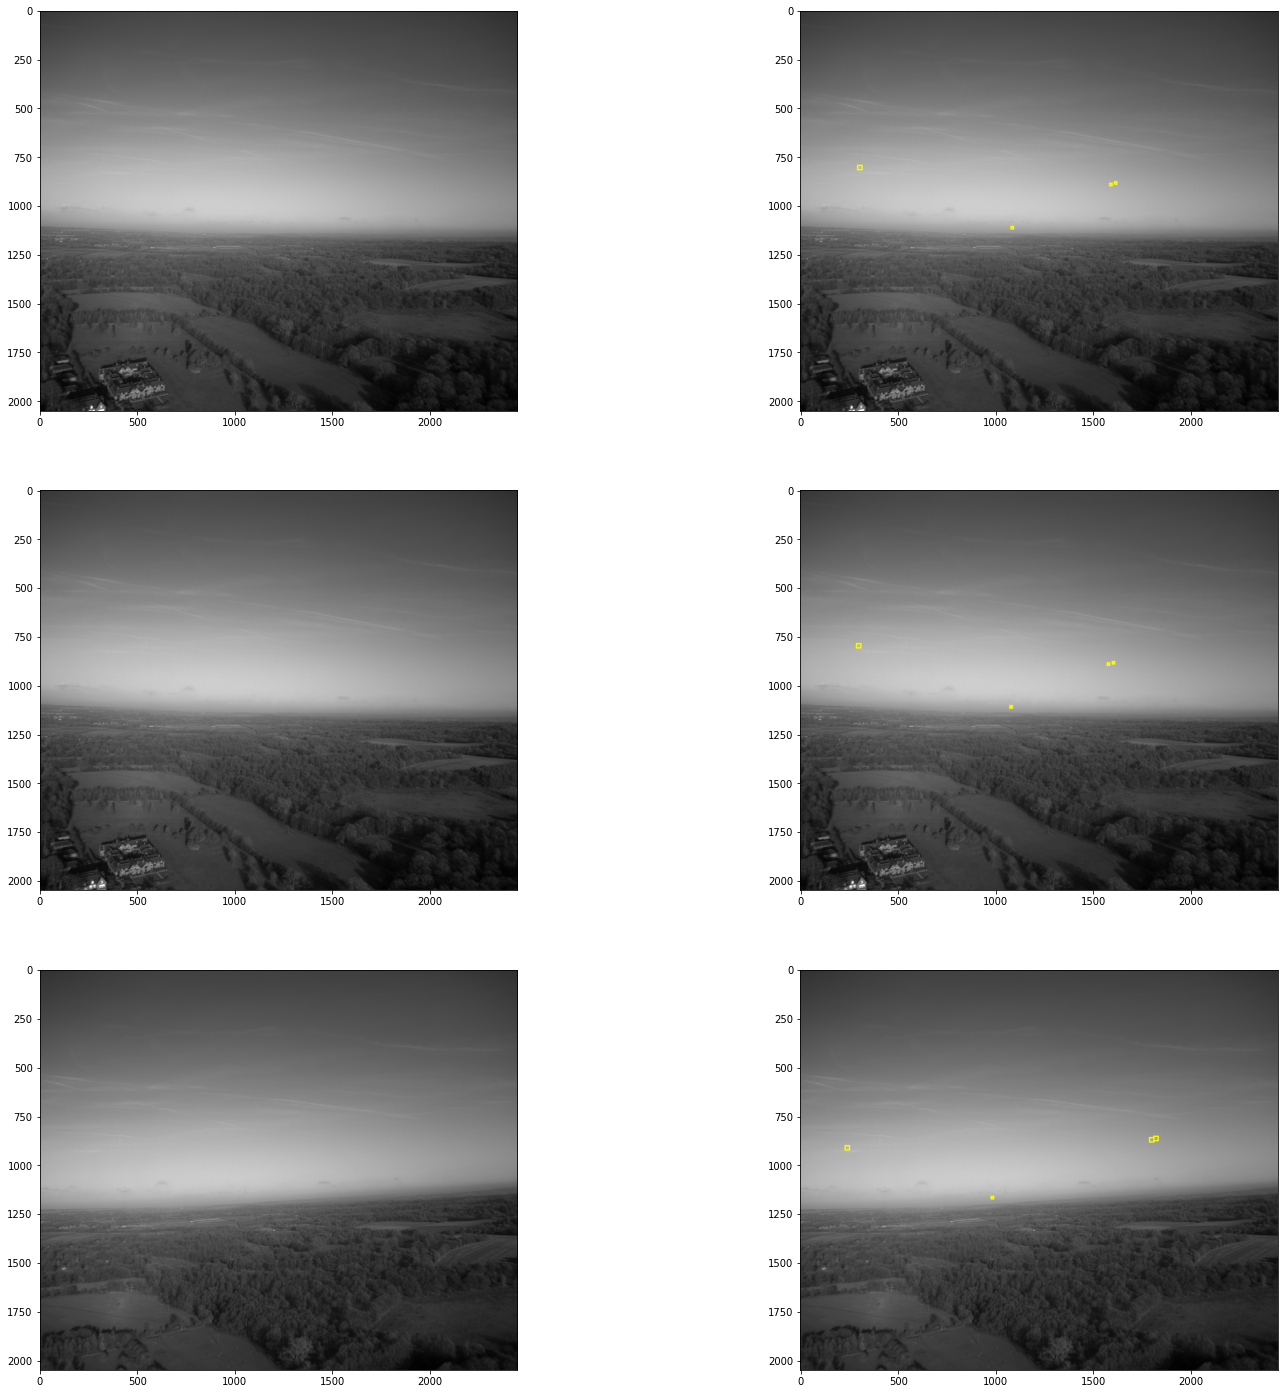

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=25,25

import time

# Let's get one of the "planned" object in this video
airborne_objects = lucky_flight.detected_objects
obj_of_interest = None
for obj in airborne_objects:
    if airborne_objects[obj].planned:
        obj_of_interest = airborne_objects[obj]
        break

images = []
fig = plt.figure()


for i in range(1, 7, 2):
    frame = obj_of_interest.location[randrange(obj_of_interest.num_frames)].frame
    ax = fig.add_subplot(3, 2, i)
    ax.imshow(frame.image(type='cv2'))
    ax = fig.add_subplot(3, 2, i + 1)
    ax.imshow(frame.image_annotated())

plt.show()

In [11]:
flight_path = lucky_flight.generate_video(speed_x=5)

In [12]:
from IPython.display import Video

Video(flight_path, embed=True, width=786)

## Overall Distribution

#### ✈️ Airborne Objects Count Distribution

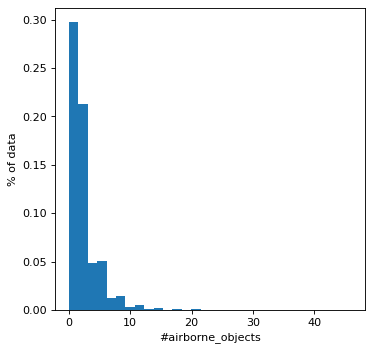

None

Avg:  2.5532286212914483
Min:  0
Max:  46


In [20]:
num_objects = []
for flight_id in dataset.get_flight_ids():
    num_objects.append(dataset.get_flight(flight_id).num_airborne_objs)

plt.figure(figsize=(5, 5), dpi=80)
plt.hist(num_objects, density=True, bins=30)
plt.ylabel('% of data')
plt.xlabel('#airborne_objects')
display(plt.show())


print("Avg: ", sum(num_objects) / len(num_objects))
print("Min: ", min(num_objects))
print("Max: ", max(num_objects))

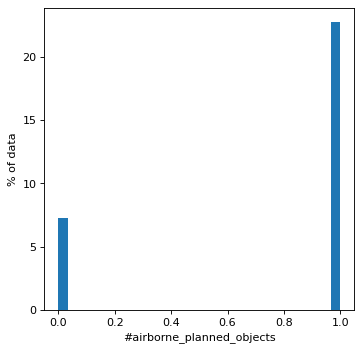

None

Min:  0
Max:  1


In [27]:
planned_num_objects = []
for flight_id in dataset.get_flight_ids():
    count = 0
    flight = dataset.get_flight(flight_id)
    for obj in flight.detected_objects:
        if flight.detected_objects[obj].planned:
            count += 1
    
    planned_num_objects.append(count)
    
plt.figure(figsize=(5, 5), dpi=80)
plt.hist(planned_num_objects, density=True, bins=30)
plt.ylabel('% of data')
plt.xlabel('#airborne_planned_objects')
display(plt.show())


print("Min: ", min(planned_num_objects))
print("Max: ", max(planned_num_objects))

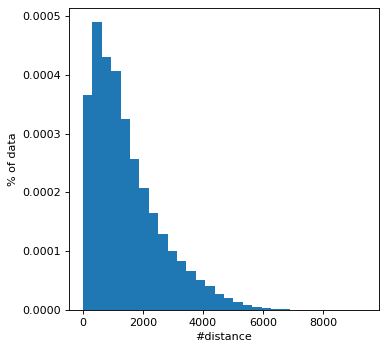

None

Avg:  1478.4207554675852
Min:  5.905805858280435
Max:  9399.925781456264


In [29]:
obj_distance = []

for flight_id in dataset.get_flight_ids():
    flight = dataset.get_flight(flight_id)
    for obj in flight.detected_objects:
        if flight.detected_objects[obj].planned:
            for loc in flight.detected_objects[obj].location:
                obj_distance.append(loc.range_distance_m)

plt.figure(figsize=(5, 5), dpi=80)
plt.hist(obj_distance, density=True, bins=30)
plt.ylabel('% of data')
plt.xlabel('#distance')
display(plt.show())

print("Avg: ", sum(obj_distance) / len(obj_distance))
print("Min: ", min(obj_distance))
print("Max: ", max(obj_distance))

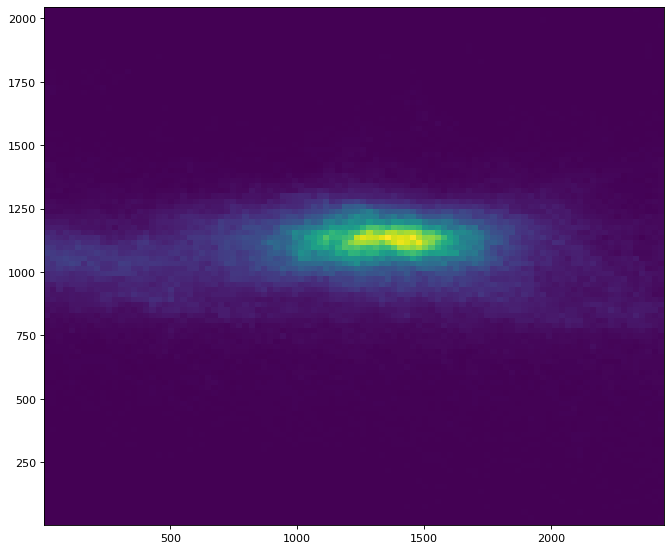

In [53]:
obj_center_left = []
obj_center_top = []

for flight_id in dataset.get_flight_ids():
    flight = dataset.get_flight(flight_id)
    for obj in flight.detected_objects:
        if flight.detected_objects[obj].planned:
            for loc in flight.detected_objects[obj].location:
                left, top = loc.bb.get_center()
                obj_center_left.append(left)
                obj_center_top.append(top)

heatmap, xedges, yedges = np.histogram2d(obj_center_left, obj_center_top, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(10, 10), dpi=80)
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

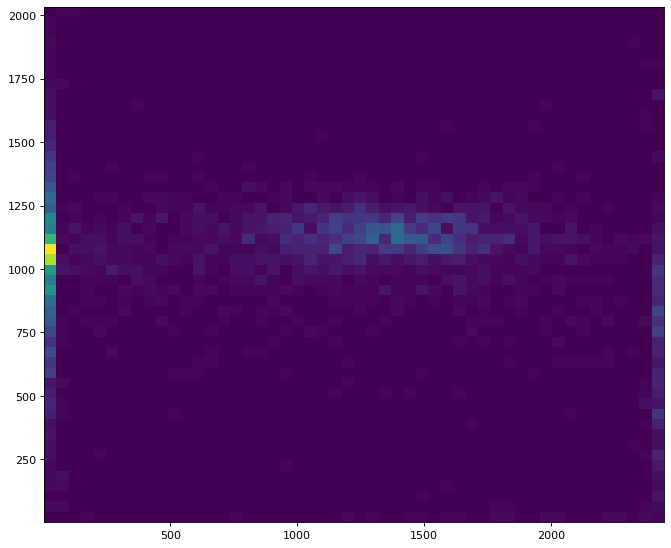

In [54]:
# Entry??
obj_center_left_entry = []
obj_center_top_entry = []

for flight_id in dataset.get_flight_ids():
    flight = dataset.get_flight(flight_id)
    for obj in flight.detected_objects:
        if flight.detected_objects[obj].planned:
            for loc in flight.detected_objects[obj].location:
                left, top = loc.bb.get_center()
                obj_center_left_entry.append(left)
                obj_center_top_entry.append(top)
                break

heatmap, xedges, yedges = np.histogram2d(obj_center_left_entry, obj_center_top_entry, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(10, 10), dpi=80)
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

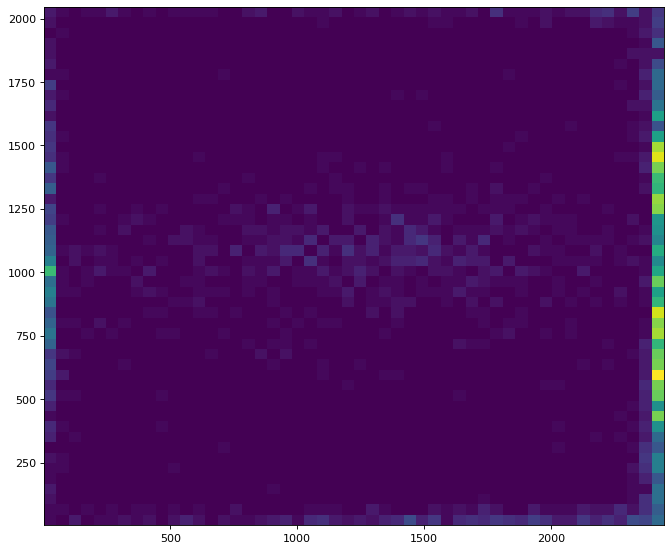

In [50]:
# Exit!
obj_center_left_entry = []
obj_center_top_entry = []

for flight_id in dataset.get_flight_ids():
    flight = dataset.get_flight(flight_id)
    for obj in flight.detected_objects:
        if flight.detected_objects[obj].planned:
            loc = flight.detected_objects[obj].location[-1]
            left, top = loc.bb.get_center()
            obj_center_left_entry.append(left)
            obj_center_top_entry.append(top)

heatmap, xedges, yedges = np.histogram2d(obj_center_left_entry, obj_center_top_entry, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(10, 10), dpi=80)
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

# _fin._

### We hope you had fun exploring data with us! 👋 

### You can fork this notebook to add more explorations in starter kit [here](https://gitlab.aicrowd.com/amazon-prime-air/airborne-detection-starter-kit) or submit your own notebook to the challenge [here](https://www.aicrowd.com/challenges/airborne-object-tracking-challenge/notebooks).